# Problem 1

In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error,classification_report,plot_confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('cubic_zirconia.csv') #loading the dataset

In [3]:
df_1 = df_1.drop('Unnamed: 0',axis=1)

In [4]:
df_1.sample(10) #sample of the data

,carat,cut,color,clarity,depth,table,x,y,z,price
12066,0.41,Premium,E,SI1,58.8,62.0,4.87,4.85,2.86,852
16797,0.90,Premium,G,VS2,59.6,61.0,6.25,6.20,3.71,4022
6532,1.61,Very Good,G,SI1,NaN,56.0,7.44,7.54,4.69,12028
5453,0.31,Premium,G,VS1,62.1,58.0,4.35,4.31,2.69,802
12096,0.30,Very Good,E,VVS2,60.0,55.0,4.36,4.41,2.63,837
1604,0.41,Premium,F,VS2,60.3,60.0,4.84,4.81,2.91,1107
21491,1.20,Premium,F,VVS2,62.8,60.0,6.79,6.74,4.25,10580
16527,1.50,Good,J,VS2,63.6,58.0,7.20,7.23,4.59,7177
22788,1.31,Ideal,G,VVS2,59.2,59.0,7.12,7.18,4.23,11459
14304,0.71,Fair,F,SI1,62.6,57.0,5.73,5.68,3.57,2088


In [5]:
df_1.info() #info about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
df_1.isnull().sum() #null count 

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
df_1.describe(include='all') # statistical description

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [8]:
df_1['depth'].fillna(df_1['depth'].median(),inplace=True) #filling the null values with median for 'depth'

In [9]:
for feature in df_1.columns: # checking the value count of each level in the object type attributes
    if df_1[feature].dtype==('object'):
        print(df_1[feature].value_counts(),'\n')

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64 

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64 

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64 



****************************************************************************************************
Distplot for variable: carat


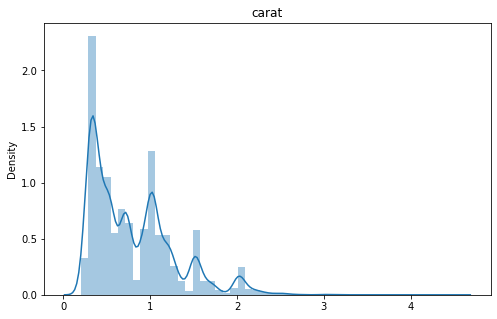

****************************************************************************************************
Boxplot for variable: carat


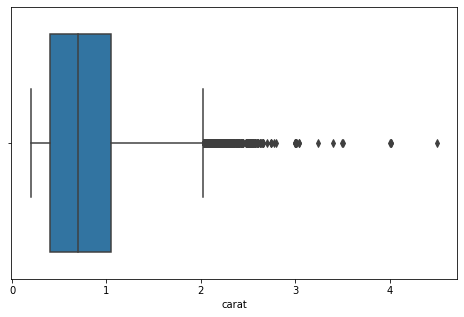

---------------------------------------------------------------------------------------------------- 
 

Countplot for variable: cut


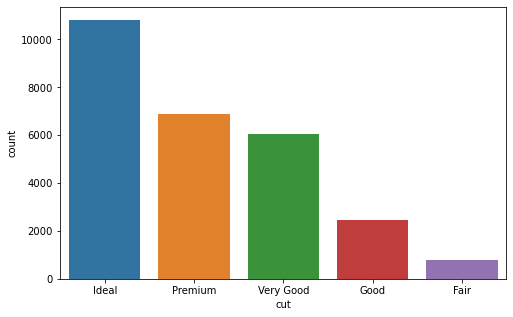

----------------------------------------------------------------------------------------------------
 

Countplot for variable: color


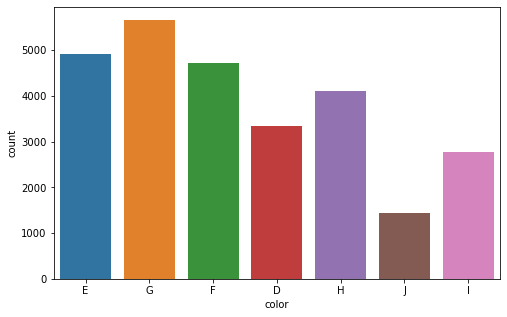

----------------------------------------------------------------------------------------------------
 

Countplot for variable: clarity


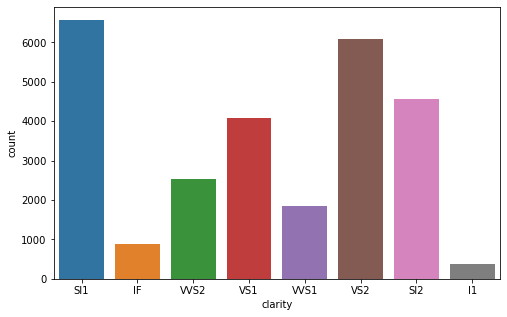

----------------------------------------------------------------------------------------------------
 

****************************************************************************************************
Distplot for variable: depth


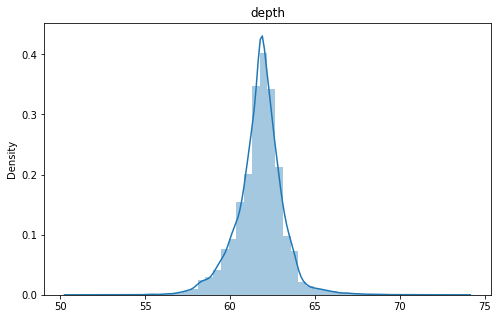

****************************************************************************************************
Boxplot for variable: depth


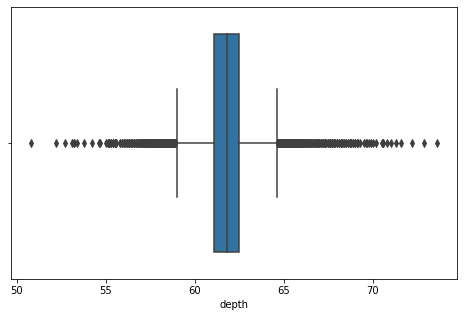

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: table


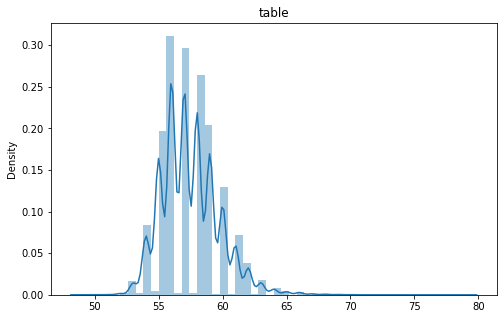

****************************************************************************************************
Boxplot for variable: table


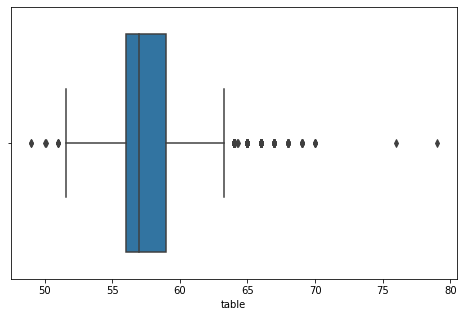

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: x


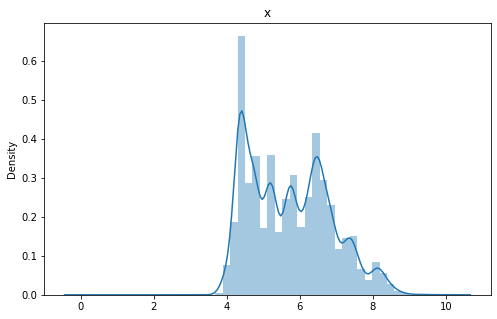

****************************************************************************************************
Boxplot for variable: x


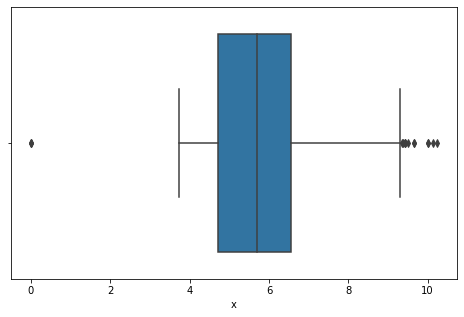

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: y


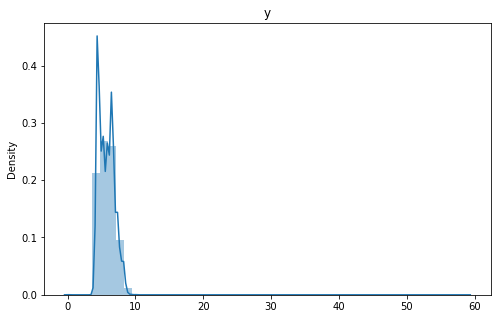

****************************************************************************************************
Boxplot for variable: y


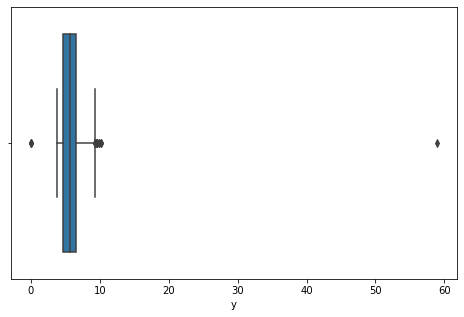

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: z


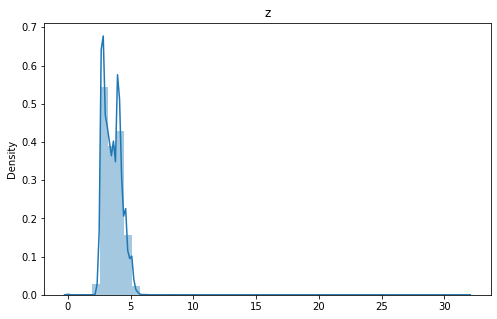

****************************************************************************************************
Boxplot for variable: z


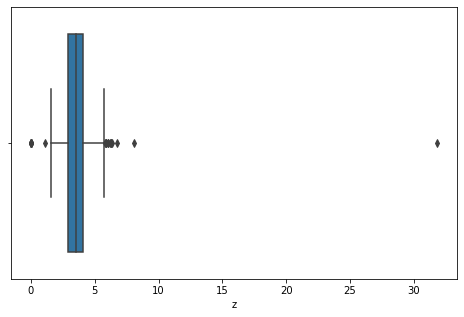

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: price


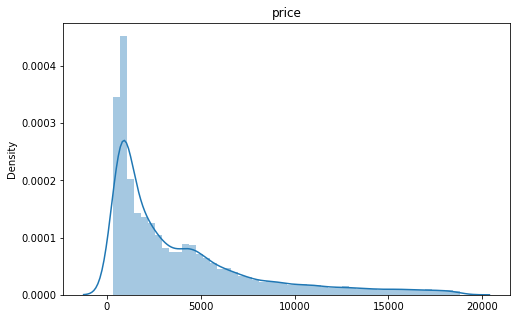

****************************************************************************************************
Boxplot for variable: price


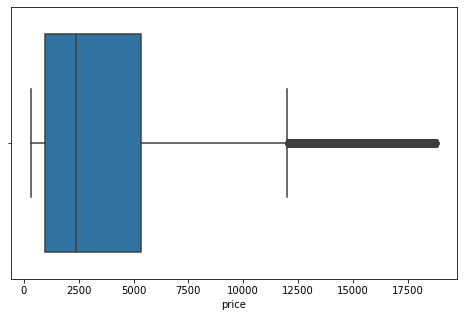

---------------------------------------------------------------------------------------------------- 
 



In [10]:
# Univariate Analysis
plt.rcParams["figure.figsize"] = (8,5)
for i in df_1.columns:
    if type(df_1[i][0])==str:
        print('Countplot for variable:',i)
        sns.countplot(df_1[i])
        plt.show()
        print('-'*100+'\n \n')
    else:
        print('*'*100)
        print('Distplot for variable:',i)
        plt.title(i)
        sns.distplot(x=df_1[i])
        plt.show()
        print('*'*100)
        print('Boxplot for variable:',i)
        sns.boxplot(x=i,data=df_1)
        plt.show()
        print('-'*100+' \n \n')

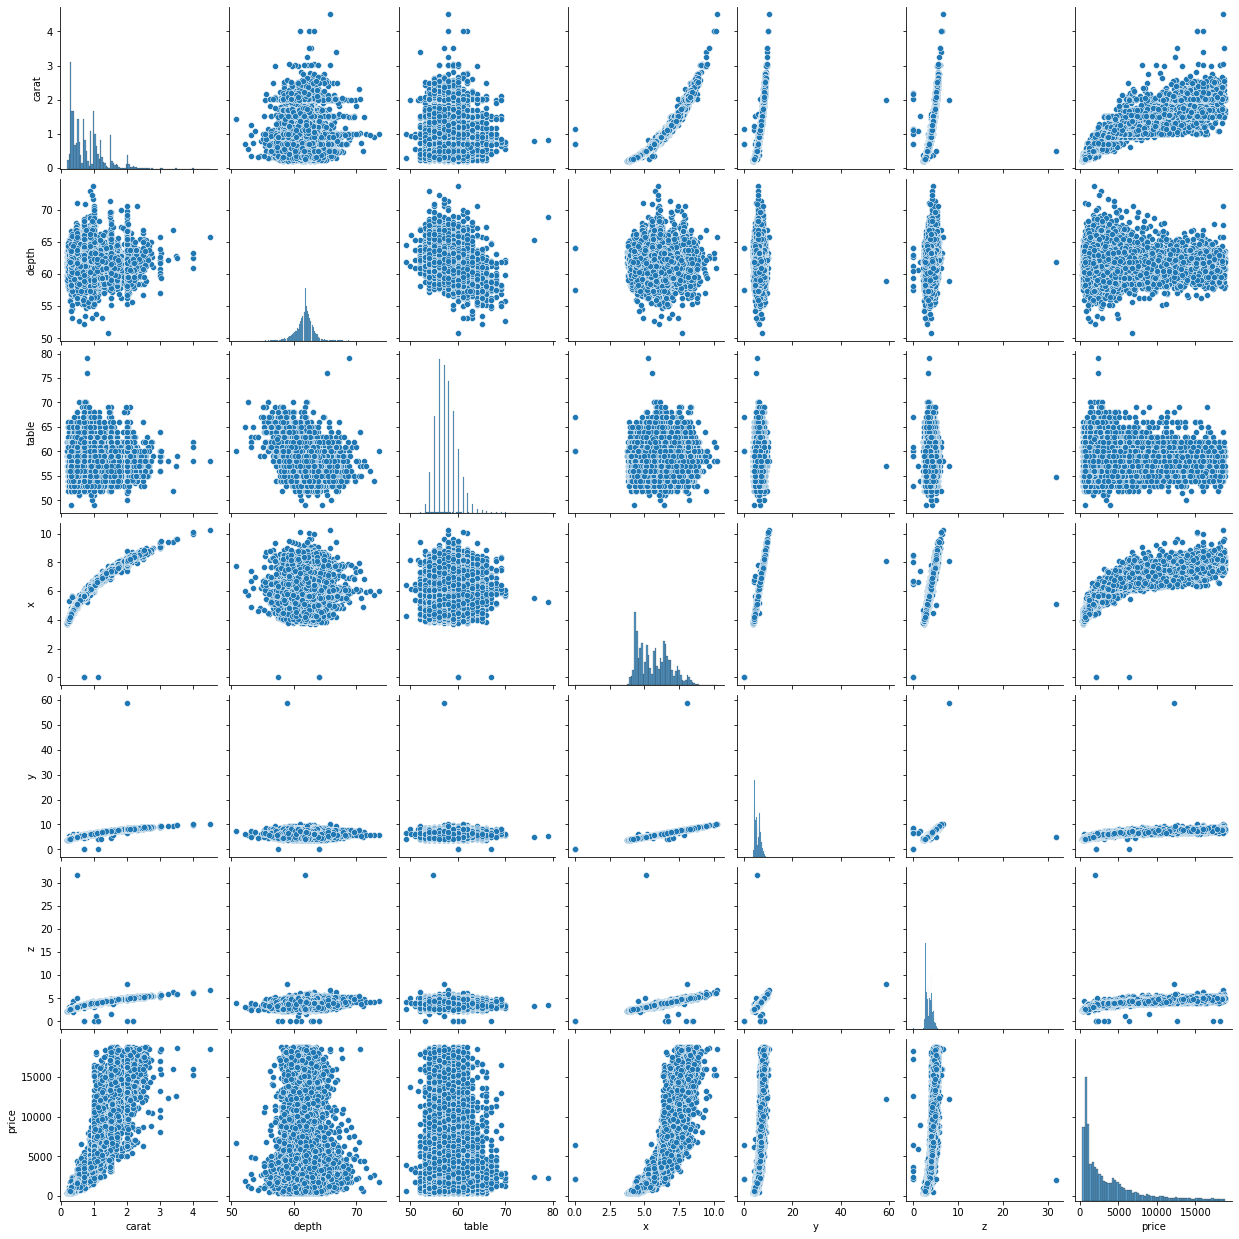

In [11]:
sns.pairplot(df_1);

In [12]:
# dropping the extreme outliers

index= df_1[(df_1['z']==0) | (df_1['y']==0) | (df_1['x']==0) | (df_1['y']>20) | (df_1['z']>20)].index
print(len(index))
df_1.drop(index,inplace=True) 
df_1.reset_index(drop=True,inplace=True)

11


In [13]:
#replacing the categorical levels with numerical values in ordinal manner

df_1['cut'].replace(to_replace=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],value=[0,1,2,3,4],inplace=True)
df_1['color'].replace(to_replace='D E F G H I J'.split(),value= [6,5,4,3,2,1,0],inplace=True)
df_1['clarity'].replace(to_replace='IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1'.split(','),value=[7,6,5,4,3,2,1,0],inplace=True)

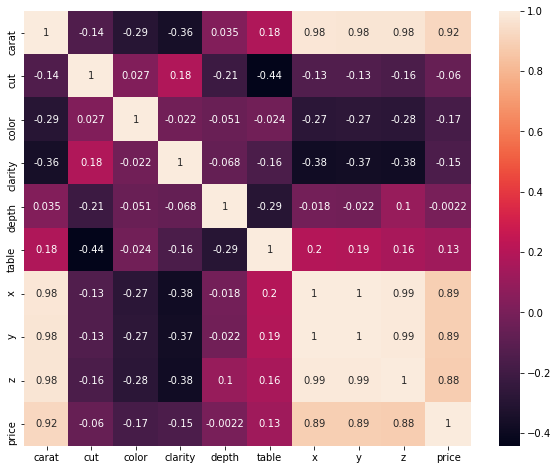

In [14]:
plt.figure(figsize=[10,8])
sns.heatmap(df_1.corr(),annot=True);

In [15]:
# Scaling the data for better interpretation of coefficients

sc = StandardScaler()
df_sc = sc.fit_transform(df_1)
df_sc = pd.DataFrame(df_sc,columns=df_1.columns)

In [16]:
# splitting the data in train and test set
X =  df_sc.drop('price',axis=1) #df_1.drop('price',axis=1)
y =  df_sc.pop('price')  #df_1.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
# # FOR UNSCALED ANALYSIS:
# # splitting the data in train and test set
# X = df_1.drop('price',axis=1)
# y = df_1.pop('price')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
#creating linear regression model and fitting the train data
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)

LinearRegression()

In [19]:
#getting the predictions on train and test set
y_pred_tr = lr_mod.predict(X_train)
y_pred=lr_mod.predict(X_test)

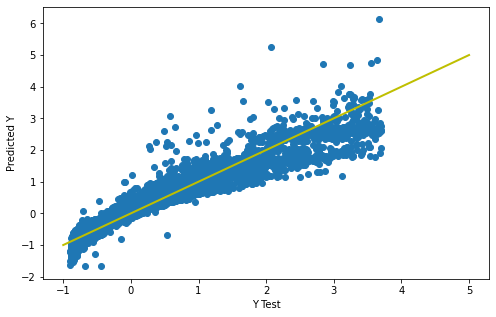

In [20]:
# Scatter plot for actual and predicte values on test set
plt.scatter(y_test,y_pred);
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([-1,5],[-1,5],'y-',linewidth=2);

In [21]:
# getting the coefficients for linear regression model
coeff = lr_mod.coef_
pd.Series(abs(coeff),index=df_sc.columns).sort_values(ascending=False)

carat      1.290928
y          0.721356
x          0.491194
z          0.483778
clarity    0.205101
color      0.141416
cut        0.038863
depth      0.033386
table      0.010584
dtype: float64

In [22]:
from sklearn import metrics
# checking the performance of the model on train set
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_tr))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_tr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))

MAE: 0.20255646772975258
MSE: 0.09226913251329713
RMSE: 0.30375834558625237


In [23]:
lr_mod.score(X_train,y_train) #coefficient of determination (R-squared) value for train set

0.9073225278924052

In [24]:
from sklearn import metrics
# checking the performance of the model on test set
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.20113592600824978
MSE: 0.08758166554513709
RMSE: 0.2959419969269943


In [25]:
lr_mod.score(X_test,y_test) #coefficient of determination (R-squared) value for test set

0.9133074296757195

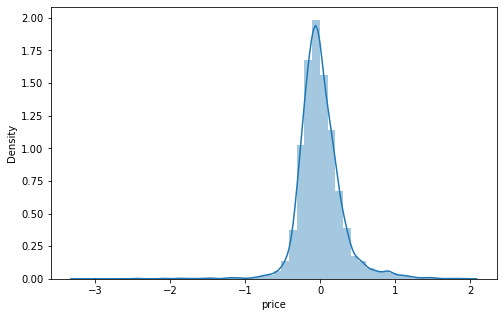

In [26]:
sns.distplot((y_test-y_pred),bins=50); #error distribution plot

In [27]:

# Using Statsmodel library for Linear Regression model
from statsmodels.formula.api import ols
expr= 'price ~ carat+ cut + color + clarity + depth + table + x + y + z'
lm1 = ols(formula= expr, data = df_1).fit()
lm1.params

Intercept    -3851.728814
carat        10998.945265
cut            128.830767
color          327.142124
clarity        494.502506
depth           42.900102
table          -21.132501
x            -1859.184859
y             2149.886721
z            -2003.606058
dtype: float64

In [28]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.999e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:02:25   Log-Likelihood:            -2.2964e+05
No. Observations:               26956   AIC:                         4.593e+05
Df Residuals:                   26946   BIC:                         4.594e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3851.7288    933.143     -4.128      0.0

In [29]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3851.73) * Intercept + (10998.95) * carat + (128.83) * cut + (327.14) * color + (494.5) * clarity + (42.9) * depth + (-21.13) * table + (-1859.18) * x + (2149.89) * y + (-2003.61) * z + 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
calc_vif(X)

,variables,VIF
0,carat,25.068026
1,cut,1.510998
2,color,1.120981
3,clarity,1.238070
4,depth,6.405703
5,table,1.635259
6,x,447.153040
7,y,440.879573
8,z,352.078940


# Problem 2

In [32]:
#importing the dataset
df_2 = pd.read_csv('Holiday_Package.csv',index_col='Unnamed: 0') 

In [33]:
df_2.sample(10) #sample of the data

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
577,no,67248,37,11,0,2,no
188,no,36832,40,8,0,2,no
821,no,33578,52,4,0,1,yes
12,no,35157,60,12,0,0,no
379,yes,57694,30,15,1,1,no
250,yes,17350,58,8,0,0,no
734,yes,40549,28,8,0,2,yes
870,no,25178,24,6,2,0,yes
502,no,41397,55,10,0,0,no
136,yes,46195,40,8,0,2,no


In [34]:
df_2.info() #variable information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [35]:
df_2.isnull().sum() #null count 

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [36]:
for i in df_2.columns: #value counts for object type variables
    if df_2[i].dtype=='object':
        print('\n',i,':\n',df_2[i].value_counts(normalize=True))


 Holliday_Package :
 no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

 foreign :
 no     0.752294
yes    0.247706
Name: foreign, dtype: float64


Countplot for variable: Holliday_Package


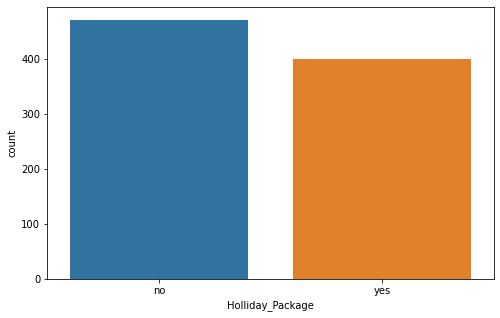

----------------------------------------------------------------------------------------------------
 

****************************************************************************************************
Distplot for variable: Salary


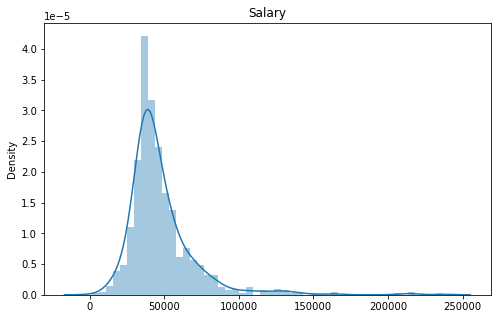

****************************************************************************************************
Boxplot for variable: Salary


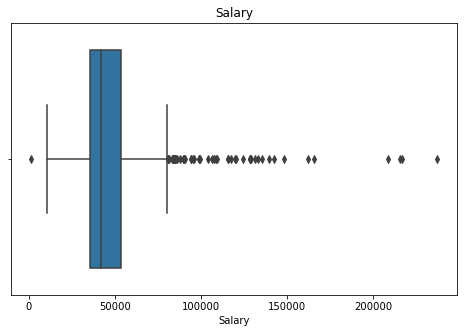

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: age


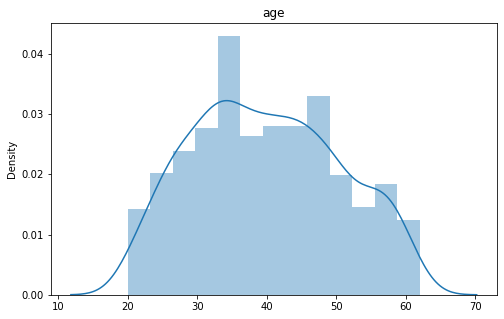

****************************************************************************************************
Boxplot for variable: age


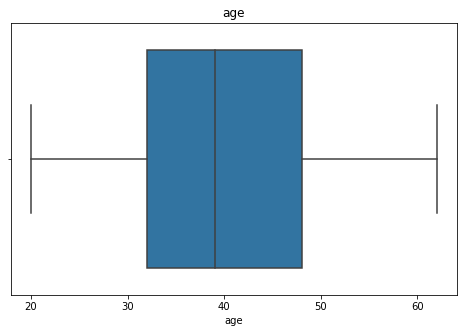

---------------------------------------------------------------------------------------------------- 
 

****************************************************************************************************
Distplot for variable: educ


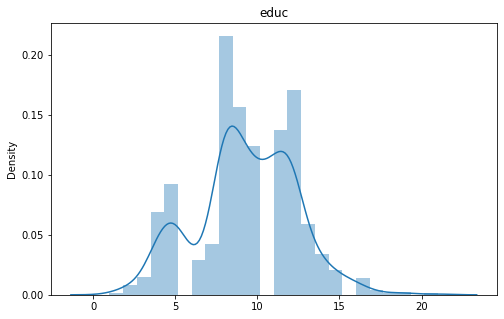

****************************************************************************************************
Boxplot for variable: educ


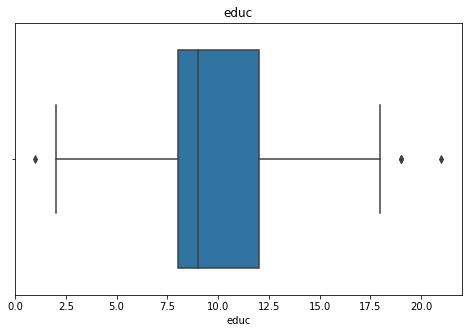

---------------------------------------------------------------------------------------------------- 
 

Countplot for variable: no_young_children


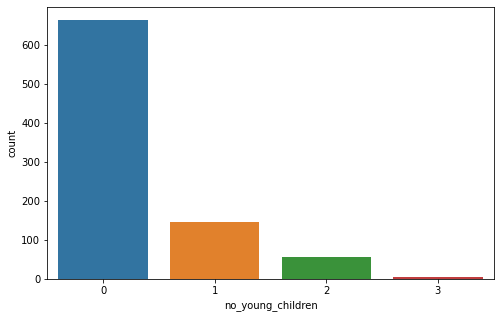

----------------------------------------------------------------------------------------------------
 

Countplot for variable: no_older_children


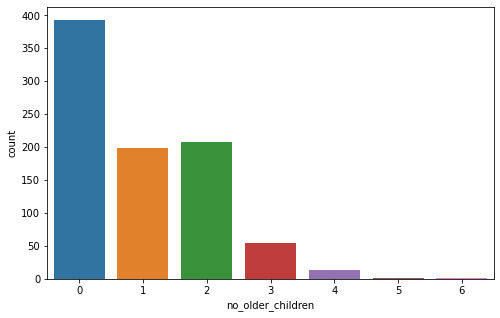

----------------------------------------------------------------------------------------------------
 

Countplot for variable: foreign


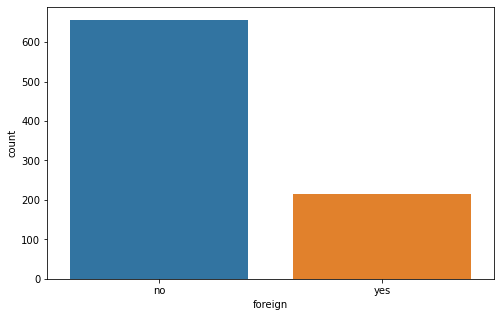

----------------------------------------------------------------------------------------------------
 



In [37]:
c_o_type = ['no_young_children', 'no_older_children','foreign','Holliday_Package']
# Univariate Analysis
plt.rcParams["figure.figsize"] = (8,5)
for i in df_2.columns:
    if i in c_o_type:
        print('Countplot for variable:',i)
        sns.countplot(df_2[i])
        plt.show()
        print('-'*100+'\n \n')
    else:
        print('*'*100)
        print('Distplot for variable:',i)
        plt.title(i)
        sns.distplot(x=df_2[i])
        plt.show()
        print('*'*100)
        print('Boxplot for variable:',i)
        plt.title(i)
        sns.boxplot(x=i,data=df_2)
        plt.show()
        print('-'*100+' \n \n')

In [38]:
df_2['Holliday_Package'].replace(to_replace=['yes','no'],value=[1,0],inplace=True) #encoding of object type variables
df_2['foreign'].replace(to_replace=['yes','no'],value=[1,0],inplace=True)

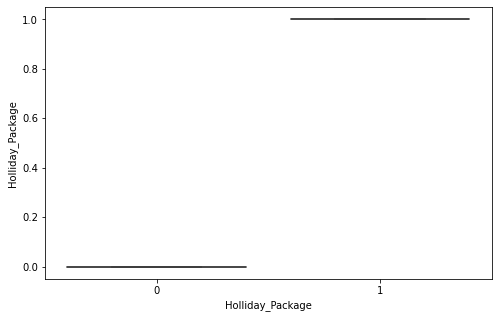


****************************************************************************************************


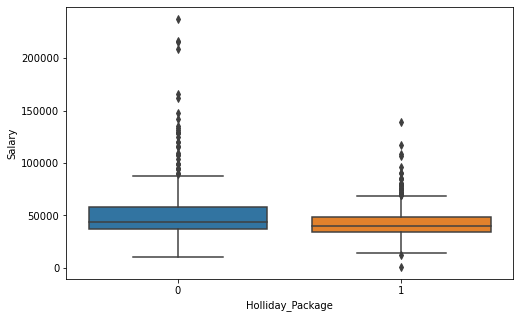


****************************************************************************************************


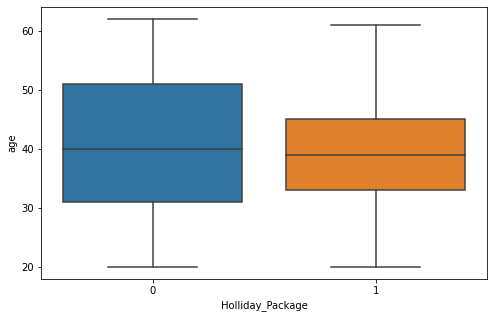


****************************************************************************************************


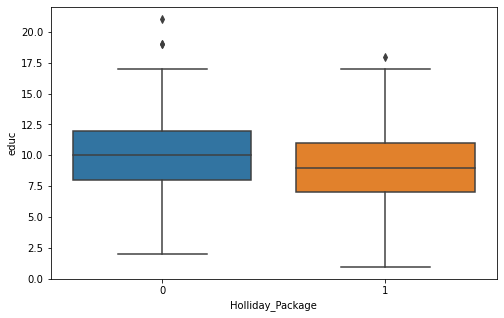


****************************************************************************************************


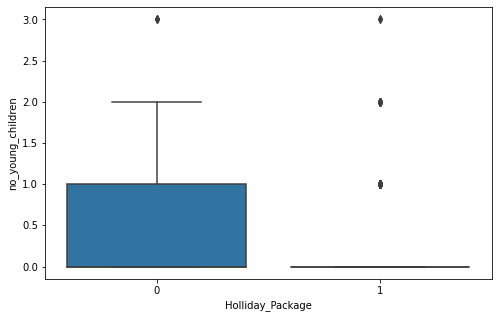


****************************************************************************************************


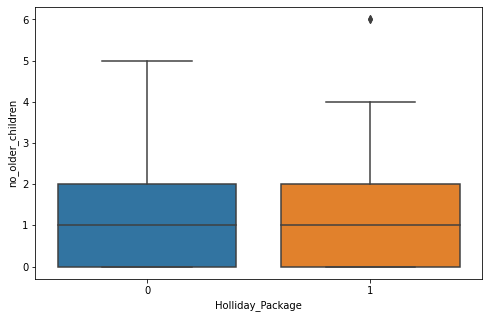


****************************************************************************************************


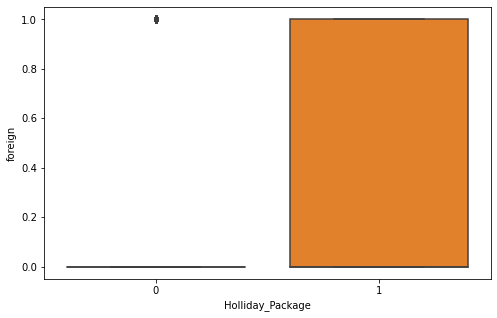


****************************************************************************************************


In [39]:
# Bi-variate Analysis

for i in df_2.columns:
#     if i not in ['foreign','Holliday_Package']:
    sns.boxplot(df_2['Holliday_Package'],df_2[i])
    plt.show()
    print('\n'+'*'*100)

In [40]:
df_2[df_2['foreign']==1]['Holliday_Package'].value_counts() # Holiday package value count for only Foreigners 

1    147
0     69
Name: Holliday_Package, dtype: int64

In [41]:
df_2.describe(include='all') #statistical description of dataset

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.459862,47729.172018,39.955275,9.307339,0.311927,0.982798,0.247706
std,0.498672,23418.668531,10.551675,3.036259,0.612870,1.086786,0.431928
min,0.000000,1322.000000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000
75%,1.000000,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000
max,1.000000,236961.000000,62.000000,21.000000,3.000000,6.000000,1.000000


In [42]:
# splitting the data in train and test set
X = df_2.drop('Holliday_Package',axis=1)
y = df_2.pop('Holliday_Package')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [43]:
y_train.value_counts(normalize=True) # checking for class proportions in train and test set

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

# Logistic Regression Model

In [45]:
#creating logistic regression model
lg_mod = LogisticRegression()
lg_mod.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred_tr = lg_mod.predict(X_train) #predicting on train set
y_pred = lg_mod.predict(X_test) #predicting on test set

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       329
           1       0.48      0.17      0.25       281

    accuracy                           0.53       610
   macro avg       0.51      0.51      0.45       610
weighted avg       0.51      0.53      0.47       610



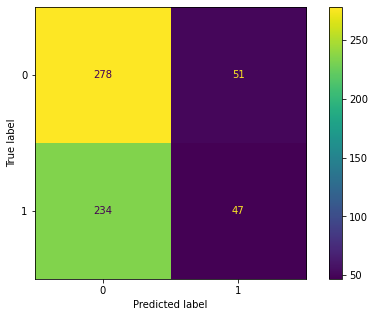

AUC: 0.5860961178595766


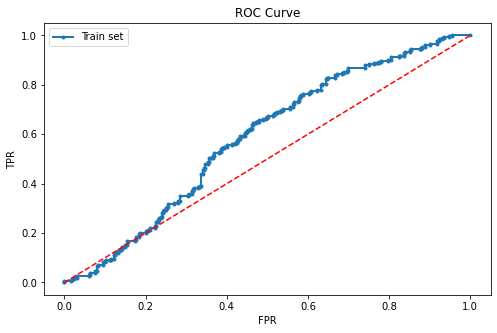

In [47]:
# Performance on train set

print(classification_report(y_train,y_pred_tr)) #classification report (checking performance metrics)
plot_confusion_matrix(lg_mod,X_train,y_train); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lg_mod.predict_proba(X_train)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_train,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       142
           1       0.49      0.17      0.25       120

    accuracy                           0.54       262
   macro avg       0.52      0.51      0.46       262
weighted avg       0.52      0.54      0.48       262



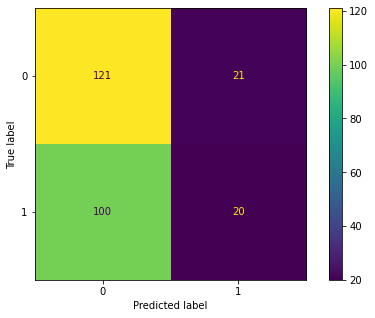

AUC: 0.5723591549295775


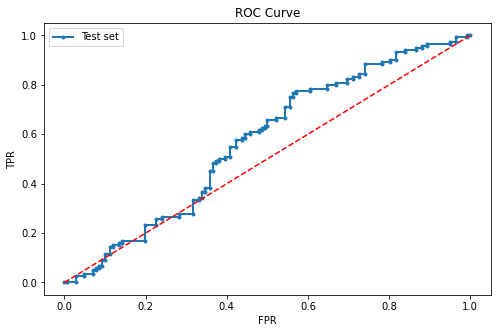

In [48]:
# Performance on Test set

print(classification_report(y_test,y_pred)) #classification report (checking performance metrics)
plot_confusion_matrix(lg_mod,X_test,y_test); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lg_mod.predict_proba(X_test)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_test,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

## Hyperparameter tuning using GridSearch method for Logit model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

space = {'penalty': ['l2'], #'l1', ],
         'C':[30], #1e-5,3e-5,1e-4,3e-4, 1e-3,3e-3, 1e-2,3e-2, 1e-1,3e-1, 1,3, 10,100],
         'solver':['newton-cg']
        }#, 'lbfgs', 'liblinear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

gs = GridSearchCV(estimator=lg_mod,param_grid=space,cv=cv,n_jobs=-1)

In [50]:
result = gs.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6655737704918033
Best Hyperparameters: {'C': 30, 'penalty': 'l2', 'solver': 'newton-cg'}


In [51]:
lg_mod_b = gs.best_estimator_ #getting the best estimator

In [52]:
y_pred_tr = lg_mod_b.predict(X_train) #predicting on train set
y_pred = lg_mod_b.predict(X_test) #predicting on test set

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       329
           1       0.68      0.55      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



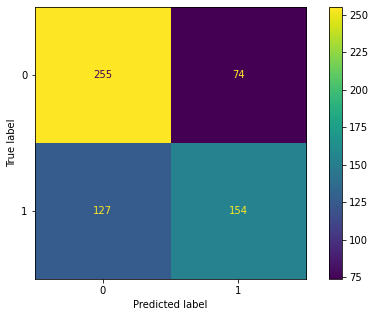

AUC: 0.7254053586301636


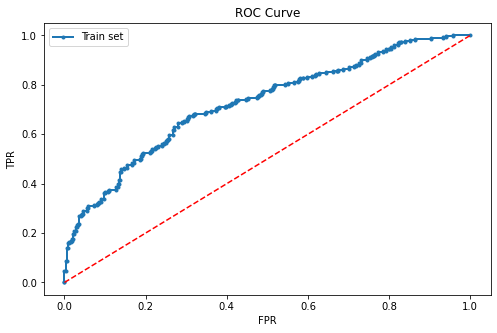

In [53]:
# Performance on train set

print(classification_report(y_train,y_pred_tr)) #classification report (checking performance metrics)
plot_confusion_matrix(lg_mod_b,X_train,y_train); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lg_mod_b.predict_proba(X_train)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_train,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.77      0.72       142
           1       0.68      0.58      0.63       120

    accuracy                           0.68       262
   macro avg       0.68      0.68      0.68       262
weighted avg       0.68      0.68      0.68       262



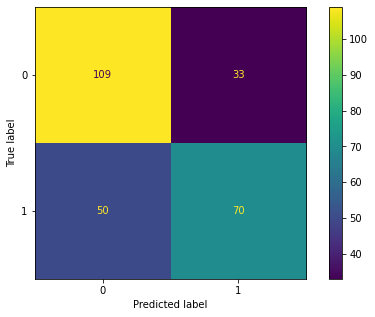

AUC: 0.7437206572769953


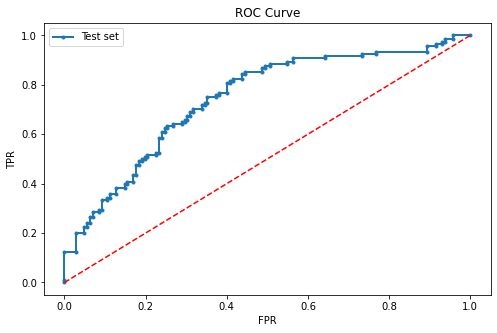

In [54]:
# Performance on Test set

print(classification_report(y_test,y_pred)) #classification report (checking performance metrics)
plot_confusion_matrix(lg_mod_b,X_test,y_test); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lg_mod_b.predict_proba(X_test)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_test,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

In [55]:
# Feature Importance
coeff = pd.DataFrame()
coeff['Variables'] = X.columns
coeff['Coefficient'] = (lg_mod_b.coef_[0])
coeff.sort_values(by='Coefficient',ascending=False)

,Variables,Coefficient
5,foreign,1.293420
2,educ,0.018262
0,Salary,-0.000019
4,no_older_children,-0.026776
1,age,-0.046060
3,no_young_children,-1.315068


# LDA 

In [56]:
lda_mod = LinearDiscriminantAnalysis() 

In [57]:
lda_mod.fit(X_train,y_train) #fitting on train set

LinearDiscriminantAnalysis()

In [58]:
space = {'shrinkage': [0.0],#np.arange(0,1,0.01),
         'solver':[ 'lsqr'],#'svd', 'eigen']
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

gs = GridSearchCV(estimator=lda_mod,param_grid=space,cv=cv,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [0.0], 'solver': ['lsqr']})

In [59]:
print('Best parameters:',gs.best_params_)
lda_mod = gs.best_estimator_

Best parameters: {'shrinkage': 0.0, 'solver': 'lsqr'}


In [60]:
y_pred_tr = lda_mod.predict(X_train) #predicting on train set
y_pred = lda_mod.predict(X_test) #predicting on test set

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       329
           1       0.68      0.52      0.59       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.65       610
weighted avg       0.67      0.67      0.66       610



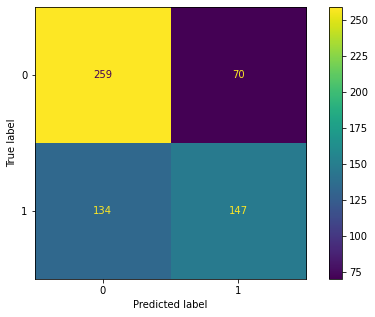

AUC: 0.7261300825319906


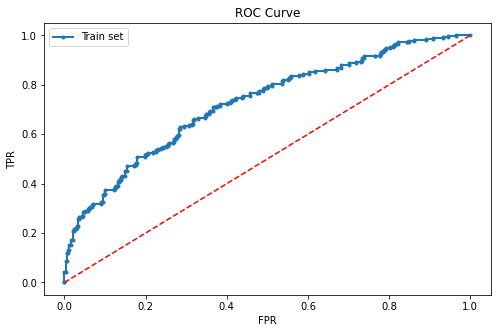

In [61]:
# Performance on train set

print(classification_report(y_train,y_pred_tr)) #classification report (checking performance metrics)
plot_confusion_matrix(lda_mod,X_train,y_train); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lda_mod.predict_proba(X_train)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_train,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       142
           1       0.68      0.57      0.62       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.68       262



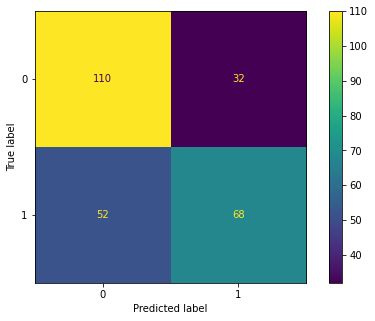

AUC: 0.7440140845070423


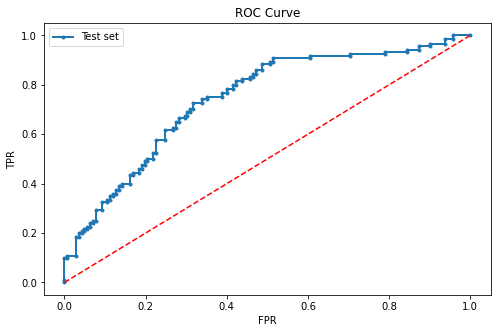

In [62]:
# Performance on Test set

print(classification_report(y_test,y_pred)) #classification report (checking performance metrics)
plot_confusion_matrix(lda_mod,X_test,y_test); #plotting confusion matrix
plt.show()

# ROC AUC score and ROC curve:
y_prob = lda_mod.predict_proba(X_test)
y_prob =y_prob[:,1]
print('AUC:',metrics.roc_auc_score(y_test,y_prob))
[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

In [63]:
# Feature Importance
coeff = pd.DataFrame()
coeff['Variables'] = X.columns
coeff['Coefficient'] = (lda_mod.coef_[0])
coeff.sort_values(by='Coefficient',ascending=False)

,Variables,Coefficient
5,foreign,1.350839
2,educ,0.015384
0,Salary,-0.000015
4,no_older_children,-0.031028
1,age,-0.045909
3,no_young_children,-1.237703
